In [ ]:
# !pip install --upgrade "tensorflow-gpu==2.2" "keras>=2.0"

In [1]:
import pandas as pd

path = '/content/drive/My Drive/Colab Notebooks/Intrusion/nslkdd_train_mod.csv'

df = pd.read_csv(path)

In [2]:
df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [3]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [4]:
analyze(df)


125973 rows
** duration:2981 (2%)
** protocol_type:[tcp:81.52%,udp:11.9%,icmp:6.58%]
** service:[http:32.02%,private:17.35%,domain_u:7.18%,smtp:5.81%,ftp_data:5.45%,eco_i:3.64%,other:3.46%,ecr_i:2.44%,telnet:1.87%,finger:1.4%,ftp:1.39%,auth:0.76%,Z39_50:0.68%,uucp:0.62%,courier:0.58%,bgp:0.56%,whois:0.55%,uucp_path:0.55%,iso_tsap:0.55%,time:0.52%,R2L4:0.51%,nnsp:0.5%,vmnet:0.49%,urp_i:0.48%,domain:0.45%,ctf:0.45%,csnet_ns:0.43%,supdup:0.43%,discard:0.43%,http_443:0.42%,daytime:0.41%,gopher:0.41%,efs:0.39%,systat:0.38%,link:0.38%,exec:0.38%,hostnames:0.37%,name:0.36%,mtp:0.35%,echo:0.34%,klogin:0.34%,login:0.34%,ldap:0.33%,netbios_dgm:0.32%,sunrpc:0.3%,netbios_ssn:0.29%,netstat:0.29%,netbios_ns:0.28%,ssh:0.25%,kshell:0.24%,nntp:0.23%,pop_3:0.21%,sql_net:0.19%,IRC:0.15%,ntp_u:0.13%,rje:0.07%,remote_job:0.06%,pop_2:0.06%,X11:0.06%,printer:0.05%,shell:0.05%,urh_i:0.01%,red_i:0.01%,tim_i:0.01%,pm_dump:0.0%,tftp_u:0.0%,aol:0.0%,http_8001:0.0%,harvest:0.0%,http_2784:0.0%]
** flag:[SF:59.49%,

In [5]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [6]:
encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

df.dropna(inplace=True,axis=1)

In [7]:
df[0:5]

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,protocol_type-icmp,protocol_type-tcp,protocol_type-udp,service-IRC,service-R2L4,service-X11,...,service-private,service-red_i,service-remote_job,service-rje,service-shell,service-smtp,service-sql_net,service-ssh,service-sunrpc,service-supdup,service-systat,service-telnet,service-tftp_u,service-tim_i,service-time,service-urh_i,service-urp_i,service-uucp,service-uucp_path,service-vmnet,service-whois,flag-OTH,flag-REJ,flag-RSTO,flag-RSTOS0,flag-RSTR,flag-S0,flag-S1,flag-S2,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_host_login-0,is_host_login-1,is_guest_login-0,is_guest_login-1
0,-0.110249,-0.007679,-0.004919,-0.089486,-0.007736,-0.095075,-0.027023,-0.011664,-0.036652,-0.024436,-0.012385,-0.02618,-0.01861,-0.041221,-0.717043,-0.354341,-0.637207,-0.631927,-0.374361,-0.37443,0.771280,-0.349682,-0.374558,-0.324062,-0.818887,-0.782364,-0.280281,0.069972,-0.289102,-0.639529,-0.624868,-0.224532,-0.376386,Normal,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.089486,-0.007736,-0.095075,-0.027023,-0.011664,-0.036652,-0.024436,-0.012385,-0.02618,-0.01861,-0.041221,-0.620980,-0.368109,-0.637207,-0.631927,-0.374361,-0.37443,-1.321423,0.482199,-0.374558,0.734340,-1.035684,-1.161026,2.736841,2.367728,-0.289102,-0.639529,-0.624868,-0.387633,-0.376386,Normal,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2,-0.110249,-0.007762,-0.004919,-0.089486,-0.007736,-0.095075,-0.027023,-0.011664,-0.036652,-0.024436,-0.012385,-0.02618,-0.01861,-0.041221,0.339646,-0.299272,1.602658,1.605097,-0.374361,-0.37443,-1.389663,0.038529,-0.374558,0.734340,-0.809854,-0.938283,-0.174417,-0.480195,-0.289102,1.608753,1.618949,-0.387633,-0.376386,DOS,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
3,-0.110249,-0.007723,-0.002891,-0.089486,-0.007736,-0.095075,-0.027023,-0.011664,-0.036652,-0.024436,-0.012385,-0.02618,-0.01861,-0.041221,-0.690844,-0.313040,-0.189234,-0.184522,-0.374361,-0.37443,0.771280,-0.349682,-0.374558,-1.533663,1.258749,1.066397,-0.439076,-0.383107,0.066252,-0.572081,-0.602430,-0.387633,-0.345083,Normal,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.089486,-0.007736,-0.095075,-0.027023,-0.011664,-0.036652,-0.024436,-0.012385,-0.02618,-0.01861,-0.041221,-0.472520,0.058678,-0.637207,-0.631927,-0.374361,-0.37443,0.771280,-0.349682,-0.028179,0.734340,1.258749,1.066397,-0.439076,-0.480195,-0.289102,-0.639529,-0.624868,-0.387633,-0.376386,Normal,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0


In [8]:
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome'])
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [9]:
df.groupby('outcome')['outcome'].count()

outcome
DOS       45927
Normal    67343
Probes    11656
R2L         995
U2R          52
Name: outcome, dtype: int64

In [10]:
print(df.shape)
print(x.shape)
print(y.shape)

(125973, 126)
(125973, 125)
(125973, 5)


In [34]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(94479, 125)
(31494, 125)
(94479, 5)
(31494, 5)


Dense Layer Simple NN

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(x.shape[1],), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')
history = model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
2953/2953 - 16s - loss: 0.3045 - accuracy: 0.9146 - val_loss: 0.1168 - val_accuracy: 0.9743
Epoch 2/1000
2953/2953 - 13s - loss: 0.0900 - accuracy: 0.9782 - val_loss: 0.0857 - val_accuracy: 0.9770
Epoch 3/1000
2953/2953 - 12s - loss: 0.0663 - accuracy: 0.9803 - val_loss: 0.0606 - val_accuracy: 0.9829
Epoch 4/1000
2953/2953 - 12s - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0547 - val_accuracy: 0.9841
Epoch 5/1000
2953/2953 - 12s - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0490 - val_accuracy: 0.9853
Epoch 6/1000
2953/2953 - 12s - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 7/1000
2953/2953 - 12s - loss: 0.0353 - accuracy: 0.9897 - val_loss: 0.0407 - val_accuracy: 0.9900
Epoch 8/1000
2953/2953 - 12s - loss: 0.0327 - accuracy: 0.9913 - val_loss: 0.0430 - val_accuracy: 0.9884
Epoch 9/1000
2953/2953 - 13s - loss: 0.0319 - accuracy: 0.9915 - val_loss: 0.0418 - val_accuracy: 0.9883
Epoch 10/1000
2953/2953 - 13s - loss: 0.0310 - accuracy

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

Validation score: 0.9922524925382613


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1260      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 10        
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________


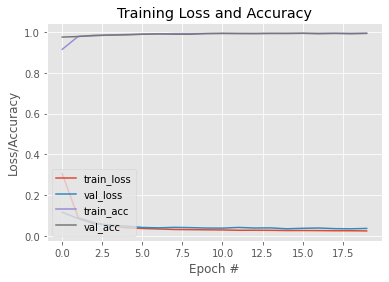

In [ ]:
# plot the training loss and accuracy
import matplotlib.pyplot as plt

N = 20
H = history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
model.summary()

In [ ]:
from sklearn.metrics import classification_report
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(x_test)

# for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), predIdxs, target_names=['DOS','Normal','Probes','R2L','U2R' ]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00     11484
      Normal       0.99      0.99      0.99     16774
      Probes       0.99      0.98      0.98      2947
         R2L       0.70      0.83      0.76       274
         U2R       0.00      0.00      0.00        15

    accuracy                           0.99     31494
   macro avg       0.74      0.76      0.75     31494
weighted avg       0.99      0.99      0.99     31494



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CNN

In [13]:
import os,sys
from scipy import stats
import numpy as np
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D,LSTM, GRU, SimpleRNN
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [14]:
X_trainc = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_testc = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(X_trainc.shape)
print(X_testc.shape)

(94479, 125, 1)
(31494, 125, 1)


In [ ]:
lstm_output_size = 70

cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same", activation="relu", input_shape=(125,1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(LSTM(lstm_output_size))
cnn.add(Dropout(0.1))
cnn.add(Dense(y.shape[1],activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
# checkpointer = callbacks.ModelCheckpoint(filepath="results/cnn1results/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
# csv_logger = CSVLogger('results/cnn1results/cnntrainanalysis1.csv',separator=',', append=False)
history2 = cnn.fit(X_trainc, y_train, epochs=50,validation_data=(X_testc, y_test),callbacks=[monitor])

Epoch 1/50
2953/2953 [==============================] - 56s 19ms/step - loss: 0.1809 - accuracy: 0.9391 - val_loss: 0.0715 - val_accuracy: 0.9748
Epoch 2/50
2953/2953 [==============================] - 61s 21ms/step - loss: 0.0706 - accuracy: 0.9769 - val_loss: 0.0539 - val_accuracy: 0.9823
Epoch 3/50
2953/2953 [==============================] - 60s 20ms/step - loss: 0.0570 - accuracy: 0.9824 - val_loss: 0.0509 - val_accuracy: 0.9819
Epoch 4/50
2953/2953 [==============================] - 56s 19ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0532 - val_accuracy: 0.9843
Epoch 5/50
2953/2953 [==============================] - 57s 19ms/step - loss: 0.0407 - accuracy: 0.9874 - val_loss: 0.0373 - val_accuracy: 0.9888
Epoch 6/50
2953/2953 [==============================] - 57s 19ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0368 - val_accuracy: 0.9889
Epoch 7/50
2953/2953 [==============================] - 56s 19ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0326 -

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 62, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 70)                37800     
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 355       
Total params: 38,411
Trainable params: 38,411
Non-trainable params: 0
_________________________________________________________________


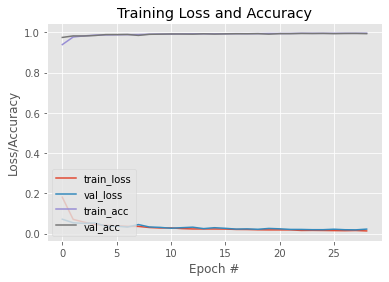

In [ ]:
# plot the training loss and accuracy
import matplotlib.pyplot as plt

N = 29
H = history2
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
cnn.summary()

In [ ]:
from sklearn.metrics import classification_report
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = cnn.predict(X_testc)

# for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), predIdxs, target_names=['DOS','Normal','Probes','R2L','U2R' ]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00     11484
      Normal       0.99      0.99      0.99     16774
      Probes       0.99      0.98      0.98      2947
         R2L       0.81      0.92      0.86       274
         U2R       0.67      0.27      0.38        15

    accuracy                           0.99     31494
   macro avg       0.89      0.83      0.84     31494
weighted avg       0.99      0.99      0.99     31494



In [ ]:
pred = cnn.predict(X_testc)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

Validation score: 0.993490823648949


In [24]:
from sklearn.model_selection import KFold
import numpy as np

lstm_output_size = 70
num_folds = 10
acc_per_fold = []
loss_per_fold = []

inputs = np.concatenate((X_trainc, X_testc), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu", input_shape=(125,1)))
    cnn.add(MaxPooling1D(pool_size=2))
    cnn.add(Convolution1D(128, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=2))
    cnn.add(LSTM(lstm_output_size, return_sequences=True))
    cnn.add(Dropout(0.1))
    cnn.add(LSTM(lstm_output_size))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(y.shape[1],activation='softmax'))
    cnn.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history2 = cnn.fit(inputs[train], targets[train], epochs=30)

    scores = cnn.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {cnn.metrics_names[0]} of {scores[0]}; {cnn.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1




#   # Fit data to model
#   history = model.fit(inputs[train], targets[train],
#               batch_size=batch_size,
#               epochs=no_epochs,
#               verbose=verbosity)
  # == Provide average scores ==


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/30
3543/3543 [==============================] - 22s 6ms/step - loss: 0.1193 - accuracy: 0.9604
Epoch 2/30
3543/3543 [==============================] - 22s 6ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 3/30
3543/3543 [==============================] - 22s 6ms/step - loss: 0.0332 - accuracy: 0.9899
Epoch 4/30
3543/3543 [==============================] - 22s 6ms/step - loss: 0.0288 - accuracy: 0.9912
Epoch 5/30
3543/3543 [==============================] - 23s 7ms/step - loss: 0.0248 - accuracy: 0.9925
Epoch 6/30
3543/3543 [==============================] - 23s 6ms/step - loss: 0.0219 - accuracy: 0.9928
Epoch 7/30
3543/3543 [==============================] - 22s 6ms/step - loss: 0.0201 - accuracy: 0.9935
Epoch 8/30
3543/3543 [==============================] - 22s 6ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 9/30
3543/3543 [==============================] - 22s 6ms/step - loss: 0.

In [25]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.01467257458716631 - Accuracy: 99.61104989051819%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.00929219089448452 - Accuracy: 99.66661334037781%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.01093282550573349 - Accuracy: 99.65074062347412%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.012340416200459003 - Accuracy: 99.53957200050354%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.012060573324561119 - Accuracy: 99.51575994491577%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.012139185331761837 - Accuracy: 99.65865015983582%
---------------------------------------------------------------

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = cnn.predict(X_testc)

# for each image in the testing set we need to find the index of the label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
print(predIdxs[:2])
print(y_test[:2])
temp = np.array([list(x).index(1) for x in y_test])
# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), predIdxs, target_names=['DOS','Normal','Probes','R2L','U2R' ]))
print('Confusion Matrix')
print(confusion_matrix(temp, predIdxs, [0,1,2,3,4 ]))

[INFO] evaluating network...
[1 0]
[[0 1 0 0 0]
 [1 0 0 0 0]]
              precision    recall  f1-score   support

         DOS       1.00      1.00      1.00     11484
      Normal       1.00      1.00      1.00     16774
      Probes       1.00      0.99      0.99      2947
         R2L       0.93      0.88      0.91       274
         U2R       0.88      0.47      0.61        15

    accuracy                           1.00     31494
   macro avg       0.96      0.87      0.90     31494
weighted avg       1.00      1.00      1.00     31494

Confusion Matrix
[[11472    12     0     0     0]
 [    5 16738    13    17     1]
 [    0    19  2928     0     0]
 [    0    32     0   242     0]
 [    0     7     1     0     7]]
